In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os
cwd = os.getcwd()
print(cwd)

C:\learn\Git\MachineLearning\HandsOnML


In [3]:
# reading the data
df = pd.read_csv("datasets/housing/housing.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Getting some info about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# checking for nulls
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualizing and checking the data tendency

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000085F54A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000008980240>]], dtype=object)

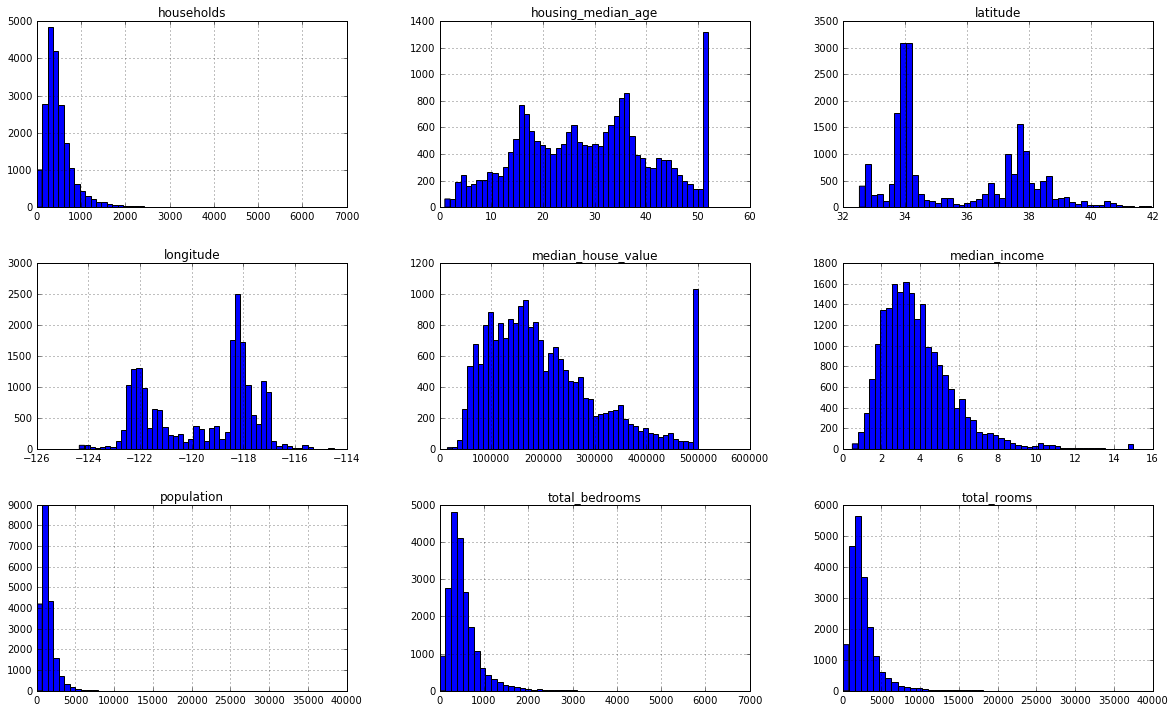

In [7]:
df.hist(bins=50, figsize=(20, 12))

In [8]:
# We can use sklearn preprocessing library for same but this is how we can write the same code in 
# python numpy

def train_test_split(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_indices = int(len(data)*test_ratio)
    train_data = shuffled_indices[test_indices:]
    test_data = shuffled_indices[:test_indices]
    return data.iloc[train_data], data.iloc[test_data]

In [9]:
train_set, test_set = train_test_split(df, 0.2)

In [10]:
print("train_set:"+str(len(train_set))+" test set:"+str(len(test_set)))

train_set:16512 test set:4128


But the problem with this implementation is that it will randomize and see the whole data over few run, we can fix it by initializing the random seed with some value but this will break out when there is a update in data, this will change the data in train and test both

In [11]:
# Using Scikit learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("train_set:"+str(len(train_set))+" test set:"+str(len(test_set)))

train_set:16512 test set:4128


income_cat - Creating a new column which categorize the data such a way that max median income will be 5  
our output variable y is median income

In [12]:
df["income_cat"]=np.ceil(df["median_income"]/1.5)
df["income_cat"].where(df["income_cat"]<5,5.0,inplace=True)

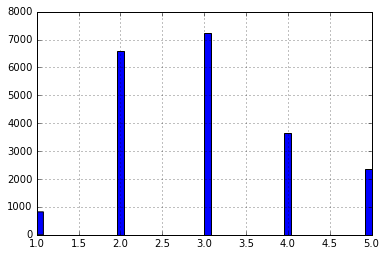

In [13]:
df["income_cat"].hist(bins=50)

As you can see, we have removed the long tail of median income and shrink the data into 1-5 range.  
Now, using sklearn Statified Split to split the data

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(df, df["income_cat"]):    # obj.split(X, y)
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [16]:
# lets check the % data distrinution in income_cat column
df["income_cat"].value_counts()/len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [17]:
# now dropping the df["income_cat"] from the train, test data
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

In [18]:
# keeping the train data copy aside to keep it intact with our explorations steps
housing = strat_train_set.copy()

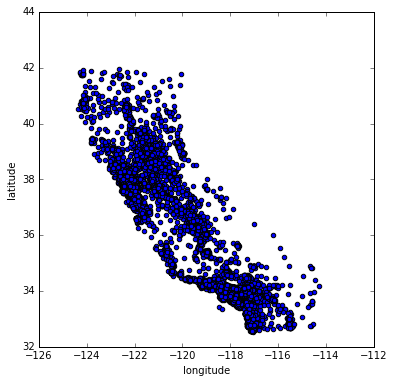

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(6, 6))

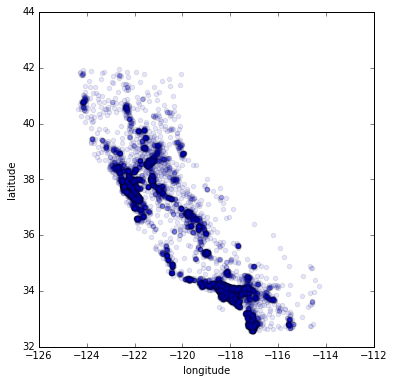

In [20]:
# for density check, add an other option alpha
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(6, 6), alpha=0.1)

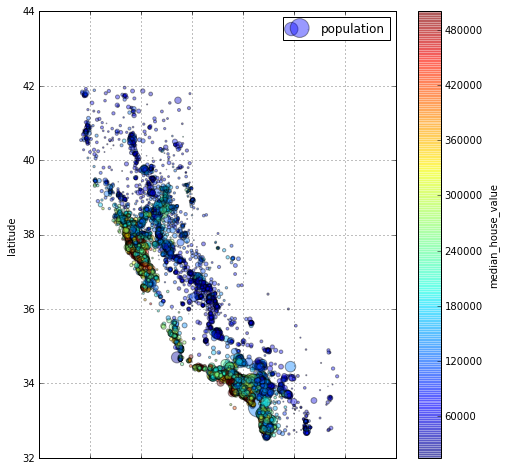

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(8, 8), alpha=0.4,
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             s=housing["population"]/100, label="population",
             grid=True,  legend=True)


### Looking for corelation if any

In [22]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [23]:
# looking for relation between 
# The correlation coefficient only measures l inear correlations (“if x goes up, then y general ly goes up/down”). 
# It may completely miss out on nonl inear relationships (e.g., “if x is close to zero then y general ly goes up”)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CAD35C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D688780>]], dtype=object)

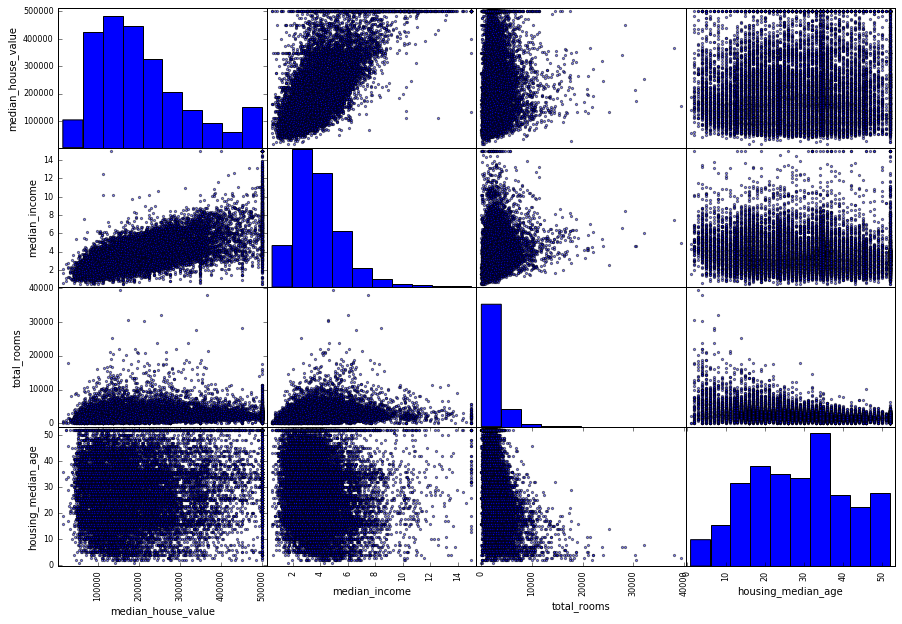

In [25]:
# Using pandas scatter matrix function
attr = ["median_house_value","median_income","total_rooms","housing_median_age"]
pd.scatter_matrix(housing[attr], figsize=(15, 10))

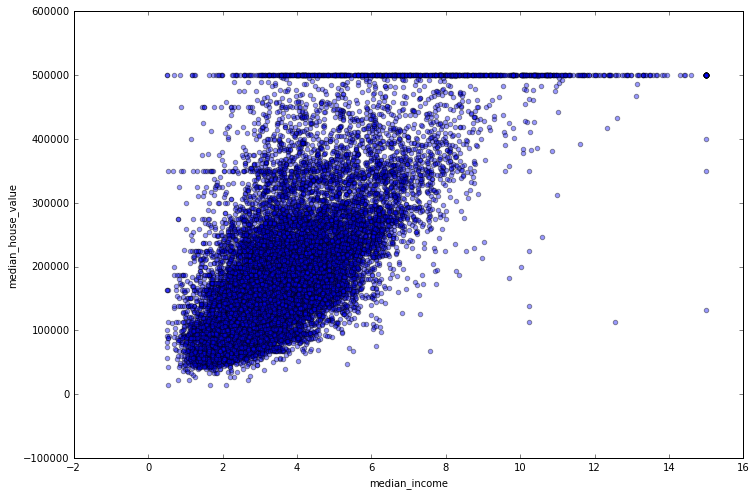

In [26]:
housing.plot(kind="scatter", y="median_house_value", x="median_income", alpha=0.4, figsize=(12,8))

### Experimenting with attribute combination

In [27]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [28]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

note	that	drop()	creates	a	copy	of	the	data	and	does	not	affect
strat_train_set

In [29]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning  
####  Handling Numerical Data  
There are 3 methods to do the data cleaning -   
a. Either Drop the particular feature (drop)  
b. Or Drop the NA values only (dropna)  
c. Or Fill NA with some value such as mean, median or other (fillna)  

```
housing.drop("total_bedrooms",	axis=1)				#	option a    
housing.dropna(subset=["total_bedrooms"])			#	option b    
median = housing["total_bedrooms"].median()    
housing["total_bedrooms"].fillna(median)			#	option c   
```

But keep one thing in mind that the fillna value is applied on test set as well.  
So you need this value to replce the na in test dataset.  
Scikit learn provides a better way to do this, Imputer  

First create a instance of Imputer method, then feed the data (numerical only) into to get the median. To use Imputer you need to remove all but numerical columns

In [30]:
housing_num = housing.drop("ocean_proximity",axis=1)  #ocean_proximity - varchar column

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

imputer.fit(housing_num)  

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [31]:
print(imputer.statistics_)
print(housing_num.median().values)

[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409]
[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409]


In [32]:
# convert this to pandas dataframe for better understanding
housing_median = pd.DataFrame(imputer.statistics_.reshape(1,8), columns=housing_num.columns)
housing_median

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.51,34.26,29.0,2119.5,433.0,1164.0,408.0,3.5409


In [33]:
# we have trained the imputer on dataset, now transform our dataset
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

#### Handling Text and Categorical Data

In [34]:
# best way to convert "Text" data to some code so that we can calculate the median

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [35]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

The problem with this encoding is ML understanding of numbers, ML treat 1 and 4 to distant compare to 1 and 2.  
Which may not be the case as this is a categorical value.  To avoid this issue we go with OneHotEncoder methond, where we have single bit on and off for each category.

In [36]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
housing_cat_1hot = onehot.fit_transform(housing_cat_encoded.reshape(-1, 1))

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Above displayed array is Scipy compressed array. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. You can use it mostly like a normal 2D array, but if you really want to convert it to a (dense) NumPy array, just call the toarray() method:

In [37]:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

We can apply both transformations (from text categories to integer categories, then from integer categories
to one-hot vectors) in one shot using the LabelBinarizer class:

In [38]:
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
housing_cat_1hot_encoded = binarizer.fit_transform(housing_cat)

housing_cat_1hot_encoded

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Transforming other features  
a. Write a Class for transforming attribute  
b. Use Pipeline, BaseEstimator OR TransformerMixin  

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [40]:
attr_adder.get_params()

{'add_bedrooms_per_room': False}

### Feature Scaling  
a. Min - Max Scaling (also called Normalization)  - Use Scikit's MinMaxScaler  
b. Standardization  - Use Scikit's StandardScaler 

Standardization is quite different: first it subtracts the mean value (so standardized values always have a
zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike
min-max scaling, standardization does not bound values to a specific range, which may be a problem for
some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However,
standardization is much less affected by outliers. For example, suppose a district had a median income
equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–
0.15, whereas standardization would not be much affected. 

### Transformation Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline (list)  -- list of tuples (name, transformation)
# transformation must have fit_transform() method
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),   # this is equivalent to-> imputer = Imputer(strategy="median")
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

As we have implemented Pipeline for numerical columns only, we can do the same for categorical/text columns.  
With the help of scikit learn "FeatureUnion" method, we can implement numerical as well categorical transformation in one go and combine the result of both to produce final dataset  

Each subpipeline starts with a selector transformer: it simply transforms the data by selecting the desired
attributes (numerical or categorical), dropping the rest, and converting the resulting DataFrame to a
NumPy array.

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [43]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)     # list of numerical columns
cat_attribs = ["ocean_proximity"]   # list of categorical columns

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

print(num_attribs)
print(cat_attribs)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['ocean_proximity']


In [44]:
#housing.tail(3)
housing_prepared = full_pipeline.fit_transform(housing)

### Train and Evaluate the model

In [47]:
# Linear Regression can be a base model 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
housing_predictions = lin_reg.predict(housing_prepared)

In [49]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(housing_labels, housing_predictions)
line_rmse = np.sqrt(lin_mse)
line_rmse

68628.198198489219